<a href="https://colab.research.google.com/github/MohamedElquesni/ACL-International-Hotel-Booking-Analytics-/blob/Nadine/Milestone%201/Milestone%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 1: International Hotel Booking Analytics
## Predicting Hotel Country Groups using Machine Learning (ML)

**Team Number:** [90]  
---

## Project Overview

**Goal:** Build a multi-class classification model to predict the country group of hotels based on user demographics, hotel characteristics, and review scores.

**Dataset:**
- 50,000 reviews across 25 hotels in 25 countries
- 2,000 unique users with demographic information
- 11 target country groups

**Deliverables:**
1. A cleaned dataset after the feature engineering step.
2. Data engineering insights, including:
 - The best city for each traveller type.
 - The top three countries with the best value-for-money scores per traveller age group.

3. A trained classification model (statistical ML or shallow FFNN).
4. Model interpretation and explainability through XAI techniques (SHAP and LIME).
5. An inference function.

---

# Section 1: Data Cleaning

## 1.1 - Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## 1.2 - Loading and Assessing Datasets

### Hotels Dataset

#### Loading the Hotels Dataset


In [67]:
df_hotels = pd.read_csv('/content/hotels.csv')
df_hotels.head() # This shows first 5 rows

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,1,The Azure Tower,New York,United States,5,40.7580,-73.9855,9.1,8.8,8.9,9.5,8.6,8.0
1,2,The Royal Compass,London,United Kingdom,5,51.5072,-0.1276,9.0,9.2,8.8,9.4,9.0,7.9
2,3,L'Étoile Palace,Paris,France,5,48.8566,2.3522,8.8,9.4,8.7,9.6,9.3,8.1
3,4,Kyo-to Grand,Tokyo,Japan,5,35.6895,139.6917,9.6,9.0,9.3,8.5,9.5,8.2
4,5,The Golden Oasis,Dubai,United Arab Emirates,5,25.2769,55.2962,9.3,9.5,9.6,8.9,9.4,8.5


#### Renaming Hotel Columns --> Hotel_ + Original Column name

In [68]:
df_hotels.columns = [
    col if col == 'hotel_id' or col == 'hotel_name' else 'hotel_' + col
    for col in df_hotels.columns
]


#### Checking for Null Values

In [69]:
df_hotels.isnull().sum()

,0
hotel_id,0
hotel_name,0
hotel_city,0
hotel_country,0
hotel_star_rating,0
hotel_lat,0
hotel_lon,0
hotel_cleanliness_base,0
hotel_comfort_base,0
hotel_facilities_base,0


#### Checking for Duplicated Values

In [70]:
df_hotels.duplicated().sum()

np.int64(0)

### Reviews Dataset

In [71]:
df_reviews = pd.read_csv('/content/reviews.csv')
df_reviews.head() # This shows the first 5 rows

,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,review_text
0,1,1600.0,1.0,2022-10-07,8.7,8.6,8.7,8.5,9.0,8.8,8.7,Practice reduce young our because machine. Rec...
1,2,432.0,4.0,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,8.6,Test cover traditional black. Process tell Mr ...
2,3,186.0,18.0,2023-12-18,8.8,9.7,8.8,8.3,8.7,8.1,8.6,Friend million student social study yeah. Grow...
3,4,1403.0,19.0,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,8.3,Huge girl already remain truth behind card. Ap...
4,5,1723.0,17.0,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,8.9,Cover feeling call community serve television ...


#### Renaming Reviews Columns --> Review_ + Original Column name

In [72]:
df_reviews.columns = [
    col if col == 'review_id'
           or col == 'user_id'
           or col == 'hotel_id'
           or col == 'review_date'
           or col == 'review_text'
        else 'review_' + col
    for col in df_reviews.columns
]


#### Checking for Null Values

In [73]:
df_reviews.isnull().sum()

,0
review_id,0
user_id,1
hotel_id,1
review_date,1
review_score_overall,1
review_score_cleanliness,1
review_score_comfort,1
review_score_facilities,1
review_score_location,1
review_score_staff,1


#### Checking for Duplicated Values

In [74]:
df_reviews.duplicated().sum()

np.int64(0)

### Users Dataset

In [75]:
df_users = pd.read_csv('/content/users.csv')
df_users.head() # This shows the 5 rows

,user_id,user_gender,country,age_group,traveller_type,join_date
0,1,Female,United Kingdom,35-44,Solo,2024-09-29
1,2,Male,United Kingdom,25-34,Solo,2023-11-29
2,3,Female,Mexico,25-34,Family,2022-04-03
3,4,Male,India,35-44,Family,2023-12-02
4,5,Other,Japan,25-34,Solo,2021-12-18


#### Renaming Users Columns --> User_ + Original Column name

In [76]:
df_users.columns = [
    col if col == 'user_id'
        or col == 'user_gender'
        else 'user_' + col
    for col in df_users.columns
]


#### Checking for Null Values

In [77]:
df_users.isnull().sum()

,0
user_id,0
user_gender,0
user_country,0
user_age_group,0
user_traveller_type,0
user_join_date,0


#### Checking for Duplicated Values

In [78]:
df_users.duplicated().sum()

np.int64(0)

## 1.3 - Merging Datasets

In [79]:
# Merge reviews with users on user_id
df_merged = pd.merge(df_reviews, df_users, on='user_id', how='left')

# Merge the result with hotels on hotel_id
df_merged = pd.merge(df_merged, df_hotels, on='hotel_id', how='left')

df_merged.head()

,review_id,user_id,hotel_id,review_date,review_score_overall,review_score_cleanliness,review_score_comfort,review_score_facilities,review_score_location,review_score_staff,...,hotel_country,hotel_star_rating,hotel_lat,hotel_lon,hotel_cleanliness_base,hotel_comfort_base,hotel_facilities_base,hotel_location_base,hotel_staff_base,hotel_value_for_money_base
0,1,1600.0,1.0,2022-10-07,8.7,8.6,8.7,8.5,9.0,8.8,...,United States,5.0,40.7580,-73.9855,9.1,8.8,8.9,9.5,8.6,8.0
1,2,432.0,4.0,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,...,Japan,5.0,35.6895,139.6917,9.6,9.0,9.3,8.5,9.5,8.2
2,3,186.0,18.0,2023-12-18,8.8,9.7,8.8,8.3,8.7,8.1,...,Egypt,5.0,30.0444,31.2357,8.8,8.7,8.6,9.1,8.7,8.4
3,4,1403.0,19.0,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,...,Spain,5.0,41.3851,2.1734,9.2,9.1,8.9,9.7,9.0,8.8
4,5,1723.0,17.0,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,...,Russia,5.0,55.7558,37.6173,9.1,9.3,9.0,9.0,9.1,8.6


In [80]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39939 entries, 0 to 39938
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   review_id                     39939 non-null  int64  
 1   user_id                       39938 non-null  float64
 2   hotel_id                      39938 non-null  float64
 3   review_date                   39938 non-null  object 
 4   review_score_overall          39938 non-null  float64
 5   review_score_cleanliness      39938 non-null  float64
 6   review_score_comfort          39938 non-null  float64
 7   review_score_facilities       39938 non-null  float64
 8   review_score_location         39938 non-null  float64
 9   review_score_staff            39938 non-null  float64
 10  review_score_value_for_money  39938 non-null  float64
 11  review_text                   39938 non-null  object 
 12  user_gender                   39938 non-null  object 
 13  u

## 1.4 - Dropping Unnecessary Columns

In [81]:
# Drop unnecessary columns that do not contribute to the predictive modeling task
# These columns are either textual, identifiers or dates that add no generalizable value

df_merged.drop(
    columns=[
        'review_date',
        'review_text',
        'user_join_date',
        'hotel_name'
    ],
    inplace=True,
    errors='ignore'  # Prevents errors if any column is already dropped
)

# Confirm remaining columns
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39939 entries, 0 to 39938
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   review_id                     39939 non-null  int64  
 1   user_id                       39938 non-null  float64
 2   hotel_id                      39938 non-null  float64
 3   review_score_overall          39938 non-null  float64
 4   review_score_cleanliness      39938 non-null  float64
 5   review_score_comfort          39938 non-null  float64
 6   review_score_facilities       39938 non-null  float64
 7   review_score_location         39938 non-null  float64
 8   review_score_staff            39938 non-null  float64
 9   review_score_value_for_money  39938 non-null  float64
 10  user_gender                   39938 non-null  object 
 11  user_country                  39938 non-null  object 
 12  user_age_group                39938 non-null  object 
 13  u

---

## 1.5 - Cleaned Dataset Summary

All datasets have been successfully loaded, cleaned, and merged:
- No null values found.
- No duplicate records.
- Columns renamed with prefixes for clarity.
- Unnecessary columns were dropped.
- Final merged dataset contains 50,000 reviews with complete hotel characteristics and user information


# Section 2: Data Engineering Questions

Using the cleaned and merged dataset, we analyze and visualize the following:

1. **Best City for Each Trave;ler Type**
   - Identify the city with the highest average review score for each traveler type.

2. **Top 3 Countries by Value-for-Money per Age Group**
   - Find the top 3 countries with the highest value-for-money score per traveller’s age group.

## 2.1 - Best City for Each Traveller Type

### Heatmap Analysis

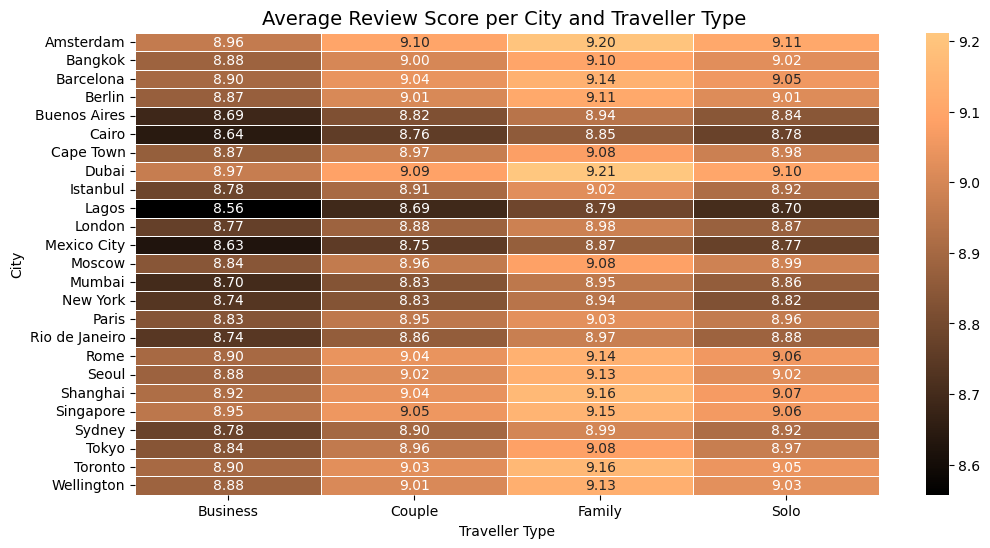

In [82]:
pivot = pd.pivot_table(
        df_merged,
        index="hotel_city",
        columns="user_traveller_type",
        values="review_score_overall",
        aggfunc="mean"
    )

plt.figure(figsize = (12,6))


sns.heatmap(pivot, annot=True, cmap="copper", fmt=".2f", linewidths=0.5)

# Extra GUI enhancements
plt.title("Average Review Score per City and Traveller Type ", fontsize=14)
plt.xlabel("Traveller Type")
plt.ylabel("City")
plt.show()


### Insights

Using the heatmap visualization, we can observe clear differences in average review scores across traveller types and cities:

- **Business travellers:** Dubai achieved the highest average score of **8.97**.
- **Couples:** Amsterdam recorded the highest average score of **9.10**.
- **Families:** Dubai again stood out with an average score of **9.21**.
- **Solo travellers:** Amsterdam had the highest average score of **9.11**.

## 2.2 - Top 3 Countries by Value-for-Money per Age Group

### Heatmap Analysis

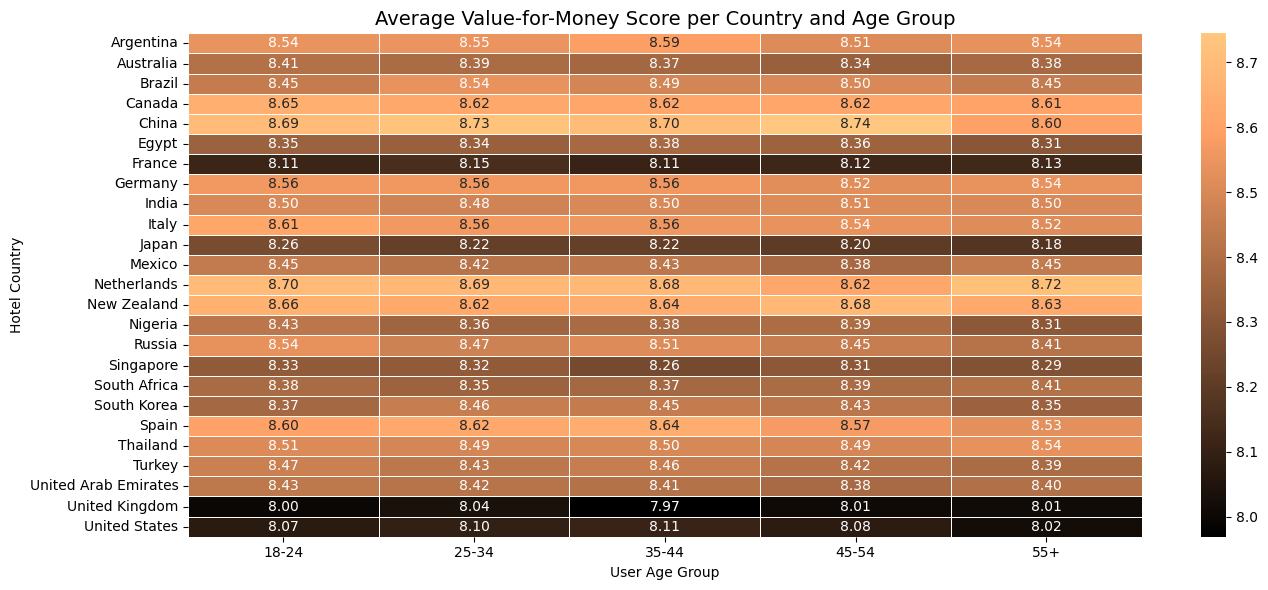

In [83]:
pivot = pd.pivot_table(
    df_merged,
    index="hotel_country",
    columns="user_age_group",
    values="review_score_value_for_money",
    aggfunc="mean"
)

plt.figure(figsize=(14, 6))

sns.heatmap(
    pivot,
    annot=True,
    cmap="copper",
    fmt=".2f",
    linewidths=0.5
)

# Extra GUI Interface
plt.title("Average Value-for-Money Score per Country and Age Group", fontsize=14)
plt.xlabel("User Age Group")
plt.ylabel("Hotel Country")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Insights

Top 3 countries by value-for-money score for each age group:

- **18–24:** China (8.71), Netherlands (8.70), Canada (8.66)
- **25–34:** China (8.73), Netherlands (8.68), Spain (8.63)
- **35–44:** China (8.70), Netherlands (8.69), New Zealand (8.65)
- **45–54:** China (8.72), New Zealand (8.67), Netherlands (8.65)
- **55+:** Netherlands (8.70), New Zealand (8.63), China (8.60)

---

# Section 3: Exploratory Data Analysis (EDA)

**Objective:** Understand data distributions, correlations, and patterns to inform feature engineering and modeling decisions.

---

## 3.1 - Target Variable Analysis

### Create Target Variable

We group the 25 countries into 11 geographic regions (country groups) to create our classification target.

In [84]:
# Create a mapping dictionary from country names to geographic regions (country groups)
# This groups the 25 countries into 11 regions (country groups) for classification
country_to_group = {
    # North America
    'United States': 'North_America',
    'Canada': 'North_America',

    # Western Europe
    'Germany': 'Western_Europe',
    'France': 'Western_Europe',
    'United Kingdom': 'Western_Europe',
    'Netherlands': 'Western_Europe',
    'Spain': 'Western_Europe',
    'Italy': 'Western_Europe',

    # Eastern Europe
    'Russia': 'Eastern_Europe',

    # East Asia
    'China': 'East_Asia',
    'Japan': 'East_Asia',
    'South Korea': 'East_Asia',

    # Southeast Asia
    'Thailand': 'Southeast_Asia',
    'Singapore': 'Southeast_Asia',

    # Middle East
    'United Arab Emirates': 'Middle_East',
    'Turkey': 'Middle_East',

    # Africa
    'Egypt': 'Africa',
    'Nigeria': 'Africa',
    'South Africa': 'Africa',

    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',

    # South America
    'Brazil': 'South_America',
    'Argentina': 'South_America',

    # South Asia
    'India': 'South_Asia',

    # North America (Mexico separate due to different characteristics)
    'Mexico': 'North_America_Mexico'
}

# Apply the mapping to create our target variable
df_merged['country_group'] = df_merged['hotel_country'].map(country_to_group)

# Quick check of the result
df_merged.head()


,review_id,user_id,hotel_id,review_score_overall,review_score_cleanliness,review_score_comfort,review_score_facilities,review_score_location,review_score_staff,review_score_value_for_money,...,hotel_star_rating,hotel_lat,hotel_lon,hotel_cleanliness_base,hotel_comfort_base,hotel_facilities_base,hotel_location_base,hotel_staff_base,hotel_value_for_money_base,country_group
0,1,1600.0,1.0,8.7,8.6,8.7,8.5,9.0,8.8,8.7,...,5.0,40.7580,-73.9855,9.1,8.8,8.9,9.5,8.6,8.0,North_America
1,2,432.0,4.0,9.1,10.0,9.1,9.0,8.6,9.4,8.6,...,5.0,35.6895,139.6917,9.6,9.0,9.3,8.5,9.5,8.2,East_Asia
2,3,186.0,18.0,8.8,9.7,8.8,8.3,8.7,8.1,8.6,...,5.0,30.0444,31.2357,8.8,8.7,8.6,9.1,8.7,8.4,Africa
3,4,1403.0,19.0,8.9,9.0,8.8,8.5,9.6,9.1,8.3,...,5.0,41.3851,2.1734,9.2,9.1,8.9,9.7,9.0,8.8,Western_Europe
4,5,1723.0,17.0,9.1,8.9,9.5,9.3,8.3,9.4,8.9,...,5.0,55.7558,37.6173,9.1,9.3,9.0,9.0,9.1,8.6,Eastern_Europe


In [85]:
# Count how many reviews belong to each country group
print("Distribution of reviews across country groups:")
print(df_merged['country_group'].value_counts().sort_index())

Distribution of reviews across country groups:
country_group
Africa                  4884
East_Asia               4873
Eastern_Europe          1559
Middle_East             3185
North_America           3139
North_America_Mexico    1609
Oceania                 3220
South_America           3193
South_Asia              1576
Southeast_Asia          3221
Western_Europe          9479
Name: count, dtype: int64


### Visualize Target Distribution

Now let's visualize the distribution to better understand class imbalance.

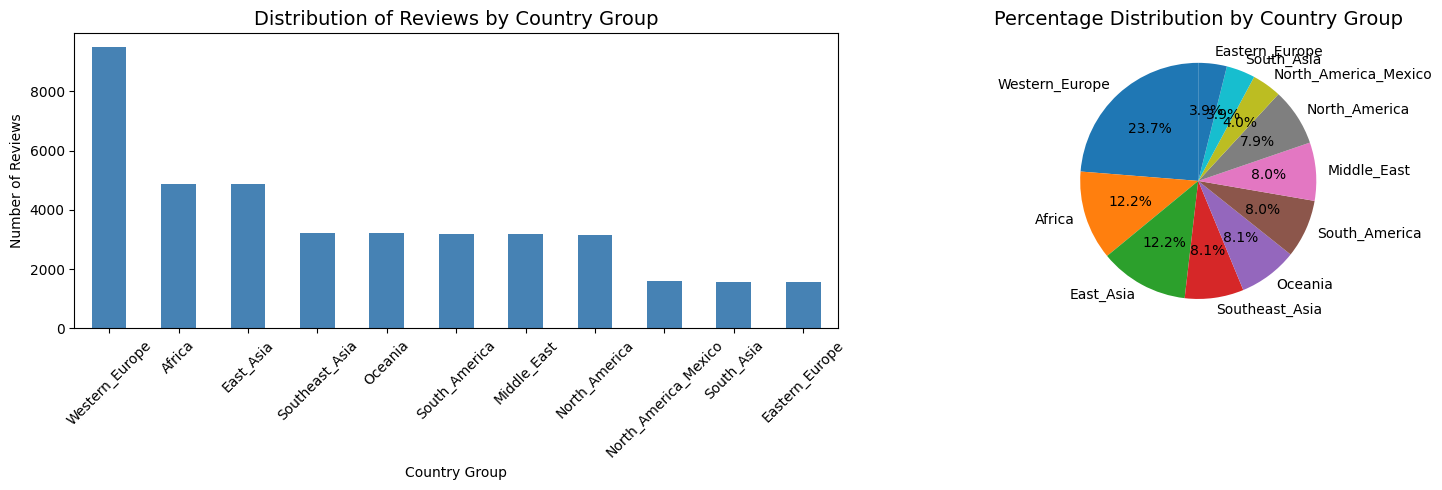


Class Imbalance Analysis:
Largest class: Western_Europe with 9479 samples
Smallest class: Eastern_Europe with 1559 samples
Imbalance ratio: 6.08:1

This means the largest class has 6.08x more samples than the smallest class.


In [86]:
# Get the distribution sorted by count (descending)
target_dist = df_merged['country_group'].value_counts().sort_values(ascending=False)

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# First plot: Bar chart showing counts
target_dist.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Distribution of Reviews by Country Group', fontsize=14)
axes[0].set_xlabel('Country Group')
axes[0].set_ylabel('Number of Reviews')
axes[0].tick_params(axis='x', rotation=45)

# Second plot: Pie chart showing percentages
axes[1].pie(target_dist, labels=target_dist.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Percentage Distribution by Country Group', fontsize=14)

plt.tight_layout()
plt.show()

# Calculate and display class imbalance statistics
largest_class = target_dist.idxmax()
smallest_class = target_dist.idxmin()
imbalance_ratio = target_dist.max() / target_dist.min()

print(f"\nClass Imbalance Analysis:")
print(f"Largest class: {largest_class} with {target_dist.max()} samples")
print(f"Smallest class: {smallest_class} with {target_dist.min()} samples")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")
print(f"\nThis means the largest class has {imbalance_ratio:.2f}x more samples than the smallest class.")

---

## 3.2 - Numerical Features Analysis

Let's analyze the distribution and statistics of numerical features to understand their behavior.

In [87]:
# First, let's identify all numerical columns in the dataset
numerical_cols = df_merged.select_dtypes(include=[np.number]).columns.tolist()

print(f"Total numerical features: {len(numerical_cols)}\n")
print("List of numerical features:")
for i, col in enumerate(numerical_cols, 1):
    print(f"  {i}. {col}")

# Get statistical summary (mean, std, min, max, quartiles)
print("\n")
print("Statistical Summary of Numerical Features:")
print("\n")
df_merged[numerical_cols].describe()

Total numerical features: 19

List of numerical features:
  1. review_id
  2. user_id
  3. hotel_id
  4. review_score_overall
  5. review_score_cleanliness
  6. review_score_comfort
  7. review_score_facilities
  8. review_score_location
  9. review_score_staff
  10. review_score_value_for_money
  11. hotel_star_rating
  12. hotel_lat
  13. hotel_lon
  14. hotel_cleanliness_base
  15. hotel_comfort_base
  16. hotel_facilities_base
  17. hotel_location_base
  18. hotel_staff_base
  19. hotel_value_for_money_base


Statistical Summary of Numerical Features:




,review_id,user_id,hotel_id,review_score_overall,review_score_cleanliness,review_score_comfort,review_score_facilities,review_score_location,review_score_staff,review_score_value_for_money,hotel_star_rating,hotel_lat,hotel_lon,hotel_cleanliness_base,hotel_comfort_base,hotel_facilities_base,hotel_location_base,hotel_staff_base,hotel_value_for_money_base
count,39939.000000,39938.000000,39938.000000,39938.000000,39938.000000,39938.000000,39938.000000,39938.000000,39938.000000,39938.000000,39938.0,39938.000000,39938.000000,39938.000000,39938.000000,39938.000000,39938.000000,39938.000000,39938.000000
mean,19969.099977,1006.949597,13.070159,8.943034,9.052334,9.024876,8.740615,9.177285,8.971125,8.433760,5.0,20.748493,34.384484,9.091084,9.063301,8.916343,9.270489,9.015329,8.513671
std,11529.384685,577.112179,7.209580,0.181174,0.503658,0.423598,0.499140,0.422043,0.398108,0.529281,0.0,30.480737,73.667254,0.226505,0.234444,0.286294,0.348312,0.237002,0.257899
min,1.000000,1.000000,1.000000,8.200000,7.700000,7.900000,7.600000,7.900000,7.900000,6.800000,5.0,-41.286500,-99.133200,8.700000,8.600000,8.500000,8.500000,8.600000,7.900000
25%,9984.500000,509.000000,7.000000,8.800000,8.700000,8.700000,8.400000,8.900000,8.700000,8.100000,5.0,6.524400,2.173400,8.900000,8.900000,8.700000,9.000000,8.800000,8.400000
50%,19969.000000,1013.000000,13.000000,8.900000,9.100000,9.000000,8.700000,9.200000,9.000000,8.500000,5.0,31.230400,18.424100,9.100000,9.100000,8.900000,9.300000,9.000000,8.500000
75%,29953.500000,1505.000000,19.000000,9.100000,9.400000,9.300000,9.100000,9.500000,9.200000,8.800000,5.0,41.902800,100.501800,9.300000,9.200000,9.100000,9.600000,9.200000,8.700000
max,39938.000000,2000.000000,25.000000,9.600000,10.000000,10.000000,10.000000,10.000000,10.000000,9.700000,5.0,55.755800,174.776200,9.600000,9.500000,9.600000,9.800000,9.500000,8.900000


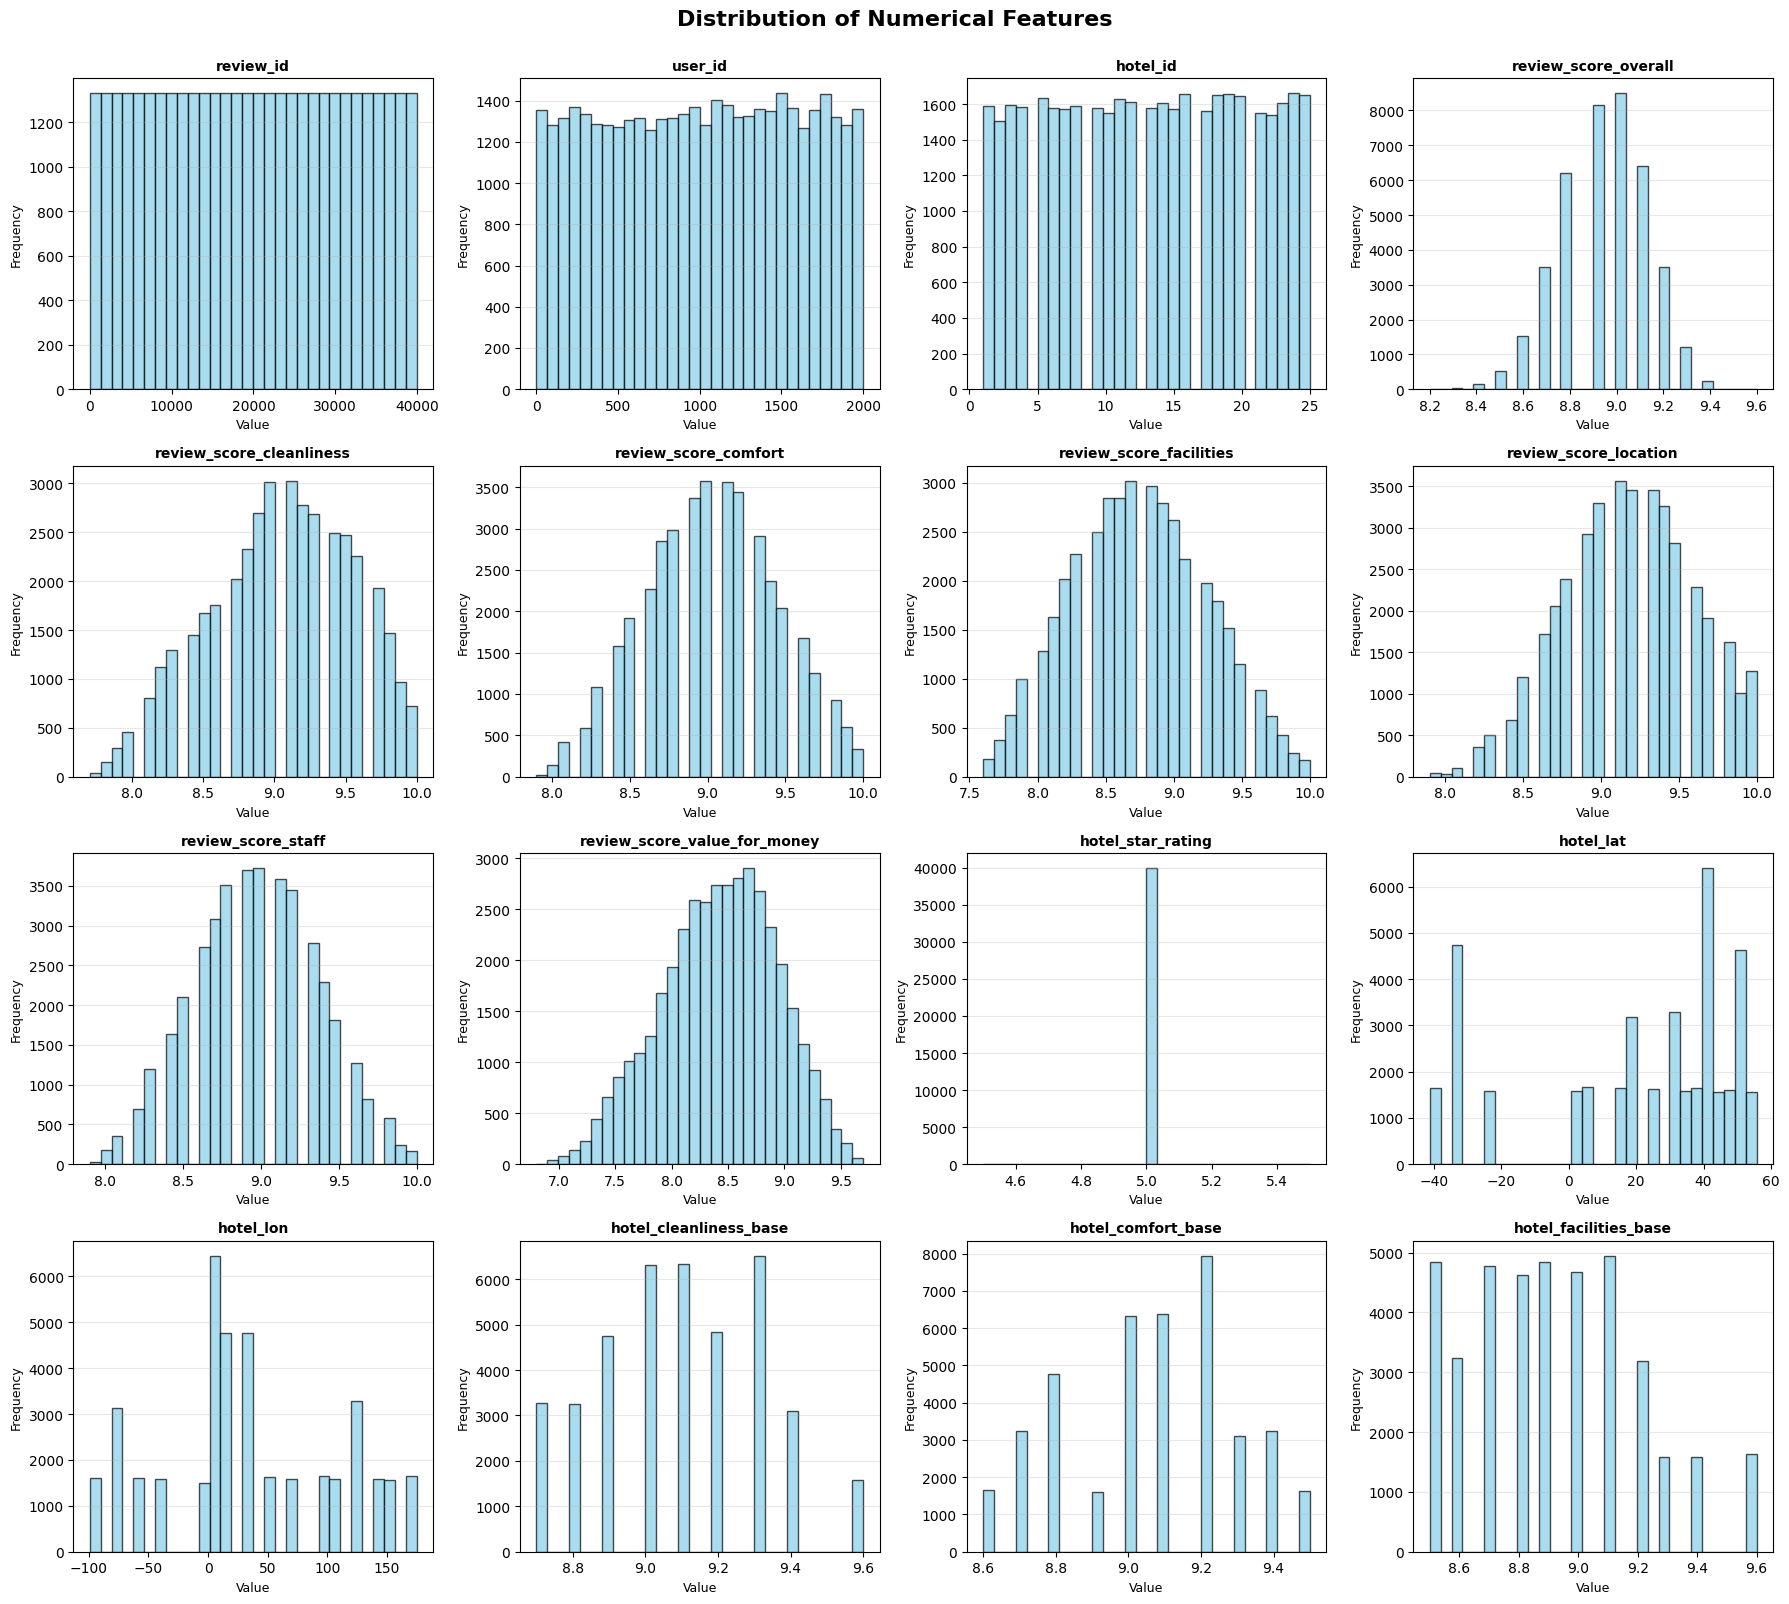

In [88]:
# Visualize the distribution of numerical features using histograms
# This helps us understand if features are normally distributed, skewed, etc.

fig, axes = plt.subplots(4, 4, figsize=(18, 16))
axes = axes.ravel()  # Flatten the 2D array to 1D for easier iteration

# Plot histogram for each numerical column (first 16 columns)
for idx, col in enumerate(numerical_cols[:16]):
    axes[idx].hist(df_merged[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

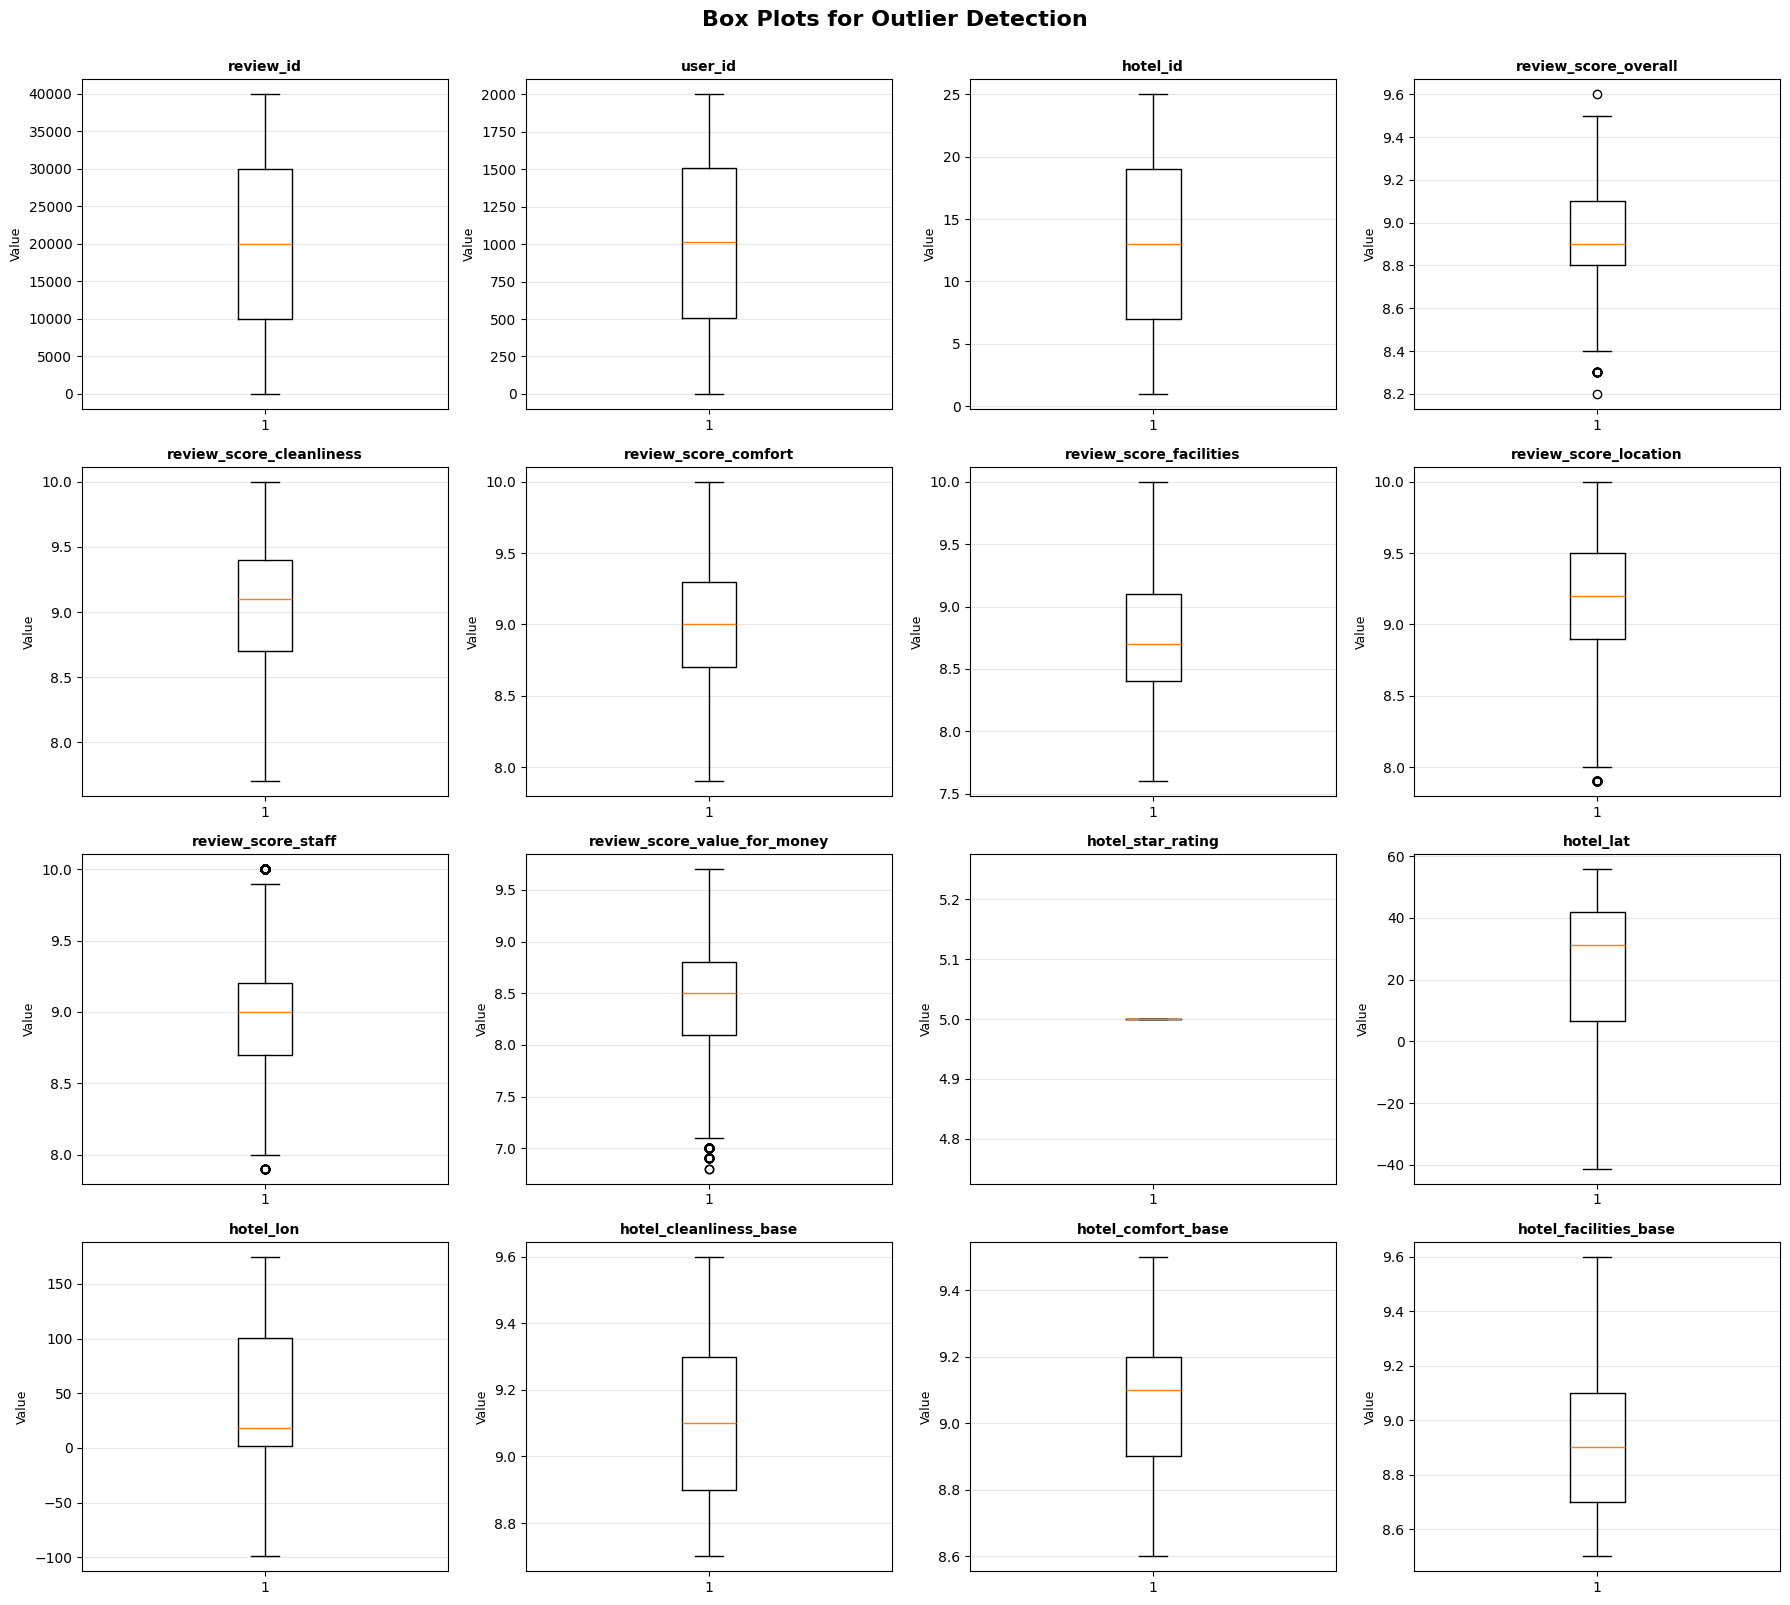


 Insights:
- The box represents the interquartile range (IQR): 25th to 75th percentile
- The line inside the box is the median (50th percentile)
- Whiskers extend to 1.5 * IQR from the box
- Points beyond whiskers are potential outliers


In [117]:
# Use box plots to detect outliers in numerical features
# Box plots show: median (center line), quartiles (box edges), and outliers (dots beyond whiskers)

fig, axes = plt.subplots(4, 4, figsize=(18, 16))
axes = axes.ravel()

# Create box plot for each numerical column
for idx, col in enumerate(numerical_cols[:16]):
    # Remove NaN values before plotting
    data = df_merged[col].dropna()
    axes[idx].boxplot(data, vert=True)
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Value', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n Insights:")
print("- The box represents the interquartile range (IQR): 25th to 75th percentile")
print("- The line inside the box is the median (50th percentile)")
print("- Whiskers extend to 1.5 * IQR from the box")
print("- Points beyond whiskers are potential outliers")

## 3.3 - Correlation Analysis

Correlation analysis helps us identify relationships between numerical features. High correlation can indicate:
- Redundant features (multicollinearity)
- Features that move together
- Potential feature combinations

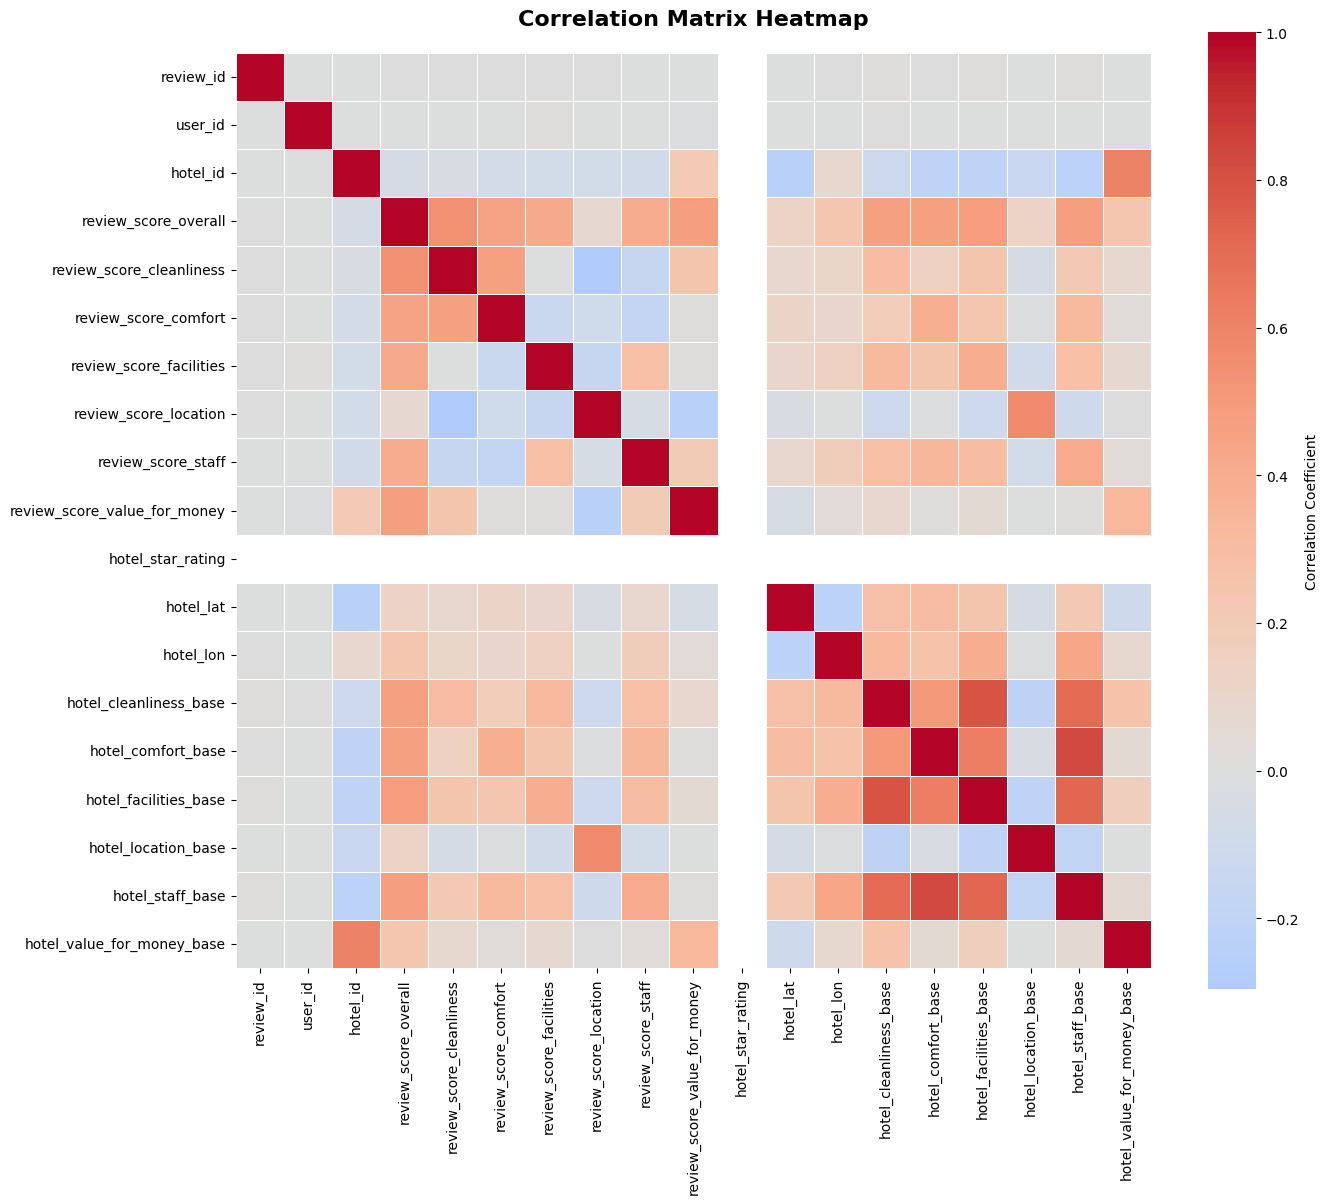



Highly Correlated Feature Pairs (|correlation| > 0.8):


Feature 1                           Feature 2                           Correlation
--------------------------------------------------------------------------------
hotel_comfort_base                  hotel_staff_base                         0.828

 Note: High correlations may cause multicollinearity issues in linear models.


In [90]:
# Calculate correlation matrix (Pearson correlation coefficient)
# Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation)
correlation_matrix = df_merged[numerical_cols].corr()

# Visualize using a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation_matrix,
    annot=False,  # Don't show numbers on the heatmap (too cluttered)
    cmap='coolwarm',  # Red = positive correlation, Blue = negative correlation
    center=0,  # Center the colormap at 0
    square=True,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find and print highly correlated pairs (correlation > 0.8 or < -0.8)
print("\n")
print("Highly Correlated Feature Pairs (|correlation| > 0.8):")
print("\n")
print(f"{'Feature 1':<35} {'Feature 2':<35} {'Correlation':>10}")
print("-"*80)

highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            feat1 = correlation_matrix.columns[i]
            feat2 = correlation_matrix.columns[j]
            print(f"{feat1:<35} {feat2:<35} {corr_value:>10.3f}")
            highly_correlated_pairs.append((feat1, feat2, corr_value))

if not highly_correlated_pairs:
    print("No highly correlated pairs found.")

print("\n Note: High correlations may cause multicollinearity issues in linear models.")

## 3.4 - Categorical Features Analysis

Let's examine the distribution of categorical features to understand user demographics and traveller characteristics.

In [91]:
# Define categorical features to analyze (user_country was removed due to data leakage)
categorical_features = ['user_gender', 'user_age_group', 'user_traveller_type']

# Display value counts for each categorical feature
print("CATEGORICAL FEATURES DISTRIBUTION")

for feat in categorical_features:
    print(f"\n{feat.upper().replace('_', ' ')}:")
    print("-" * 40)
    counts = df_merged[feat].value_counts()

    # Display counts and percentages
    for value, count in counts.items():
        percentage = (count / len(df_merged)) * 100
        print(f"  {value:<30} {count:>6} ({percentage:>5.2f}%)")

    print(f"\n  Total unique values: {df_merged[feat].nunique()}")
    print("="*80)

CATEGORICAL FEATURES DISTRIBUTION

USER GENDER:
----------------------------------------
  Male                            18897 (47.31%)
  Female                          17244 (43.18%)
  Other                            3797 ( 9.51%)

  Total unique values: 3

USER AGE GROUP:
----------------------------------------
  25-34                           13038 (32.64%)
  35-44                           12363 (30.95%)
  45-54                            6261 (15.68%)
  18-24                            4299 (10.76%)
  55+                              3977 ( 9.96%)

  Total unique values: 5

USER TRAVELLER TYPE:
----------------------------------------
  Couple                          13822 (34.61%)
  Family                           9490 (23.76%)
  Solo                             8362 (20.94%)
  Business                         8264 (20.69%)

  Total unique values: 4


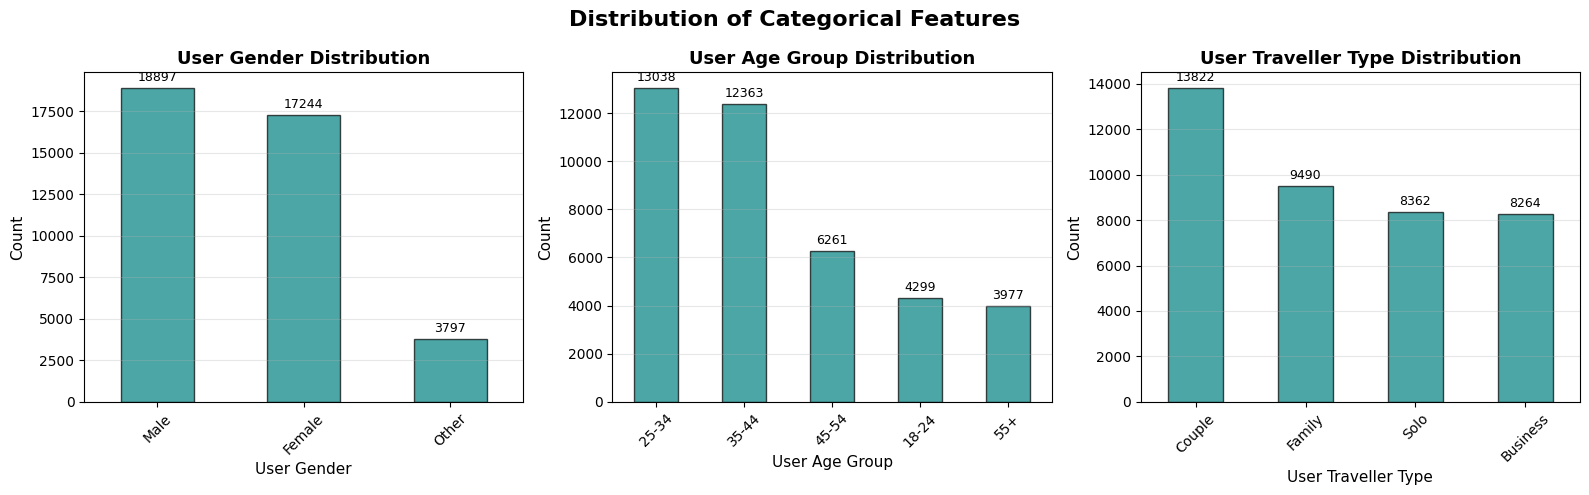

In [92]:
# Visualize categorical features using bar charts
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
axes = axes.ravel()

# Create a bar chart for each categorical feature
for idx, col in enumerate(categorical_features):
    # Get value counts and plot
    value_counts = df_merged[col].value_counts()
    value_counts.plot(kind='bar', ax=axes[idx], color='teal', alpha=0.7, edgecolor='black')

    # Formatting
    axes[idx].set_title(f'{col.replace("_", " ").title()} Distribution',
                        fontsize=13, fontweight='bold')
    axes[idx].set_xlabel(col.replace('_', ' ').title(), fontsize=11)
    axes[idx].set_ylabel('Count', fontsize=11)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

    # Add value labels on top of bars
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%d', padding=3, fontsize=9)

plt.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

---

## 3.5 - EDA Summary & Key Insights

Based on the exploratory data analysis, here are the key findings:

### Target Variable (country_group)
 **Class imbalance**: The dataset shows a moderate class imbalance with a 6:1 ratio between largest and smallest country groups.
- *Largest class*: Western Europe (most reviews).
- *Smallest class*: Eastern Europe (fewest reviews).

This imbalance indicates the need for *stratified sampling* during the train/test split to ensure all regions are properly represented in the model.

### Data Leakage
The features *hotel_city* and *hotel_country* are highly correlated with the target variable *country_group*

kKeeping those features would allow the model to “cheat” by inferring the target from already-known regional information rather than learning genuine patterns.

###  Numerical Features
**Scale**: Most numerical features (review and baseline scores) are on a 0–10 scale.

**Distribution**: They are roughly normally distributed with slight right skew (most hotels receive fairly high ratings).

**Outliers**: Only a few mild outliers were detected in the box plots.

**Variance**: Features show reasonable variance, which is helpful for modeling

###  Feature Correlations
**Review scores**: Highly correlated with each other (users who rate one aspect highly tend to rate others highly too).

**Hotel baseline scores**: Show moderate correlation.

###  Categorical Features

**User Gender:**
- Fairly balanced distribution across Male/Female/Other.
- No major gender bias in the dataset.

**User Age Group:**
- Most users fall in the 25-44 age range
- Represents the primary demographic for hotel reviews.

**Traveller Type:**
- *Couples* and *Families* are the most common (make up about ~60% of reviews).

- *Business* and *Solo* travelers are less common but still well-represented.



---

# Section 4: Feature Engineering

**Objective:** Create new features that capture meaningful patterns and relationships in the data to help the model make better predictions.

Feature engineering is crucial because:
- Raw features may not fully capture predictive patterns.
- Engineered features can improve model performance.


Three types of features were created:
1. **Deviation features**: Difference between individual review scores and hotel baseline scores.
2. **Aggregate features**: Summary statistics across multiple features.
3. **Interaction features**: Combinations that capture relationships between features.

## 4.1 - Deviation Features

**Justification**: To better understand how individual user experiences differ from a hotel’s overall baseline.

It indicates:
- Whether the user’s stay was better or worse than the average experience.
- How user expectations compare with the hotel’s actual quality.
- Potential regional/cultural differences in rating behavior.

For example:
- *Large positive deviation* suggests the user had a much better experience than expected.
- *Large negative deviation* indicates disappointment or unmet expectations.
- *Small deviation* means the stay matched expectations closely.

The deviation is computed as the difference between a user's review score and the hotel's baseline score capturing the user satisfaction relative to hotel standards.



### Computing the Deviation

In [106]:
# Create deviation features
# Formula: deviation = individual_review_score - hotel_baseline_score
print(f"Total deviation features created: 6")

# Show sample deviations
print("\n Sample deviation values (first 5 reviews):")
deviation_cols = [col for col in df_merged.columns if col.startswith('deviation_')]
print(df_merged[deviation_cols].head())

Total deviation features created: 6

 Sample deviation values (first 5 reviews):
   deviation_cleanliness  deviation_comfort  deviation_facilities  \
0                   -0.5               -0.1                  -0.4   
1                    0.4                0.1                  -0.3   
2                    0.9                0.1                  -0.3   
3                   -0.2               -0.3                  -0.4   
4                   -0.2                0.2                   0.3   

   deviation_location  deviation_staff  deviation_value_for_money  
0                -0.5              0.2                        0.7  
1                 0.1             -0.1                        0.4  
2                -0.4             -0.6                        0.2  
3                -0.1              0.1                       -0.5  
4                -0.7              0.3                        0.3  


### Analysis

In [109]:
# Analyze deviation feature distributions
print("DEVIATION FEATURE STATISTICS")

for col in deviation_cols:
    mean_dev = df_merged[col].mean()
    std_dev = df_merged[col].std()
    min_dev = df_merged[col].min()
    max_dev = df_merged[col].max()

    print(f"\n{col}:")
    print(f"  Mean: {mean_dev:>6.3f} (average deviation from baseline)")
    print(f"  Std:  {std_dev:>6.3f} (variability in deviations)")
    print(f"  Min:  {min_dev:>6.3f} (most negative deviation)")
    print(f"  Max:  {max_dev:>6.3f} (most positive deviation)")

print("\n")
print("Insights")
print("   - Mean ≈ 0: Reviews align with hotel baseline")
print("   - High std: Wide variation in user experiences")
print("   - Negative values: User rated below baseline (disappointed)")
print("   - Positive values: User rated above baseline (pleased)")

DEVIATION FEATURE STATISTICS

deviation_cleanliness:
  Mean: -0.039 (average deviation from baseline)
  Std:   0.485 (variability in deviations)
  Min:  -1.300 (most negative deviation)
  Max:   0.900 (most positive deviation)

deviation_comfort:
  Mean: -0.038 (average deviation from baseline)
  Std:   0.397 (variability in deviations)
  Min:  -0.900 (most negative deviation)
  Max:   0.900 (most positive deviation)

deviation_facilities:
  Mean: -0.176 (average deviation from baseline)
  Std:   0.467 (variability in deviations)
  Min:  -1.300 (most negative deviation)
  Max:   0.900 (most positive deviation)

deviation_location:
  Mean: -0.093 (average deviation from baseline)
  Std:   0.362 (variability in deviations)
  Min:  -1.000 (most negative deviation)
  Max:   0.900 (most positive deviation)

deviation_staff:
  Mean: -0.044 (average deviation from baseline)
  Std:   0.370 (variability in deviations)
  Min:  -0.900 (most negative deviation)
  Max:   0.900 (most positive deviat

## 4.2 - Aggregate Features

**Justification**: To capture broader patterns in user behavior and hotel performance


- *Average review score:* Overall satisfaction level of the user.
- *Average hotel baseline:* Overall quality level of the hotel.
- *Average deviation:* How much user experiences typically differ from expectations.

The aggregate features summarize multiple review-related variables. They simplify the features while retaining key information.

### Creating the Aggregate Features

In [113]:
# Create aggregate features

# 1. Average of all review scores (excluding overall score to avoid redundancy)
review_score_cols = [
    'review_score_cleanliness',
    'review_score_comfort',
    'review_score_facilities',
    'review_score_location',
    'review_score_staff',
    'review_score_value_for_money'
]

df_merged['avg_review_score'] = df_merged[review_score_cols].mean(axis=1)

# 2. Average of all hotel baseline scores
hotel_baseline_cols = [
    'hotel_cleanliness_base',
    'hotel_comfort_base',
    'hotel_facilities_base',
    'hotel_location_base',
    'hotel_staff_base',
    'hotel_value_for_money_base'
]

df_merged['avg_hotel_baseline'] = df_merged[hotel_baseline_cols].mean(axis=1)

# 3. Average of all deviation features
df_merged['avg_deviation'] = df_merged[deviation_cols].mean(axis=1)

print("\n")
print(f"Total aggregate features created: 3")




Total aggregate features created: 3


### Analysis

In [111]:
# Show statistics
print("\nAggregate Feature Statistics:")
print(df_merged[['avg_review_score', 'avg_hotel_baseline', 'avg_deviation']].describe())


Aggregate Feature Statistics:
       avg_review_score  avg_hotel_baseline  avg_deviation
count      39938.000000        39938.000000   39938.000000
mean           8.899999            8.978369      -0.078370
std            0.190451            0.157699       0.164051
min            8.183333            8.616667      -0.683333
25%            8.766667            8.866667      -0.183333
50%            8.900000            9.016667      -0.083333
75%            9.033333            9.116667       0.033333
max            9.533333            9.200000       0.466667


## 4.3 - Interaction Features

**Justification**: Some patterns and insights may only emerge when features are combined.

For Example:
- *Review-baseline ratio:* Measures how a user’s rating compares proportionally to the hotel’s baseline score.

- *Satisfaction index:* Combined metric reflecting the user’s overall perception of quality.


- *Value_perception:* Measures whether quality matches perceived value.

These capture non-linear relationships that simple features might miss.

### Creating the Interaction Features

In [114]:
# Create interaction features

# 1. Ratio of average review score to average baseline
# This shows if user rates higher or lower than baseline proportionally
df_merged['review_baseline_ratio'] = (
    df_merged['avg_review_score'] / df_merged['avg_hotel_baseline']
)

# 2. Satisfaction index: combination of overall score and deviation
# High satisfaction = high overall score AND positive deviation
df_merged['satisfaction_index'] = (
    df_merged['review_score_overall'] * (1 + df_merged['avg_deviation'])
)

# 3. Value perception: value_for_money relative to average score
# Shows if user thinks quality matches the value
df_merged['value_perception'] = (
    df_merged['review_score_value_for_money'] - df_merged['avg_review_score']
)

print("\n")
print(f"Total interaction features created: 3")



Total interaction features created: 3


### Analysis

In [115]:
# Show statistics
print("\nInteraction Feature Statistics:")
interaction_cols = ['review_baseline_ratio', 'satisfaction_index', 'value_perception']
print(df_merged[interaction_cols].describe())


Interaction Feature Statistics:
       review_baseline_ratio  satisfaction_index  value_perception
count           39938.000000        39938.000000      39938.000000
mean                0.991366            8.258634         -0.466239
std                 0.018251            1.563631          0.451102
min                 0.925046            2.691667         -1.866667
25%                 0.979206            7.200000         -0.783333
50%                 0.990942            8.265000         -0.466667
75%                 1.003738            9.345000         -0.150000
max                 1.052830           13.640000          0.883333


## 4.4 - Visualizing the Engineered Features

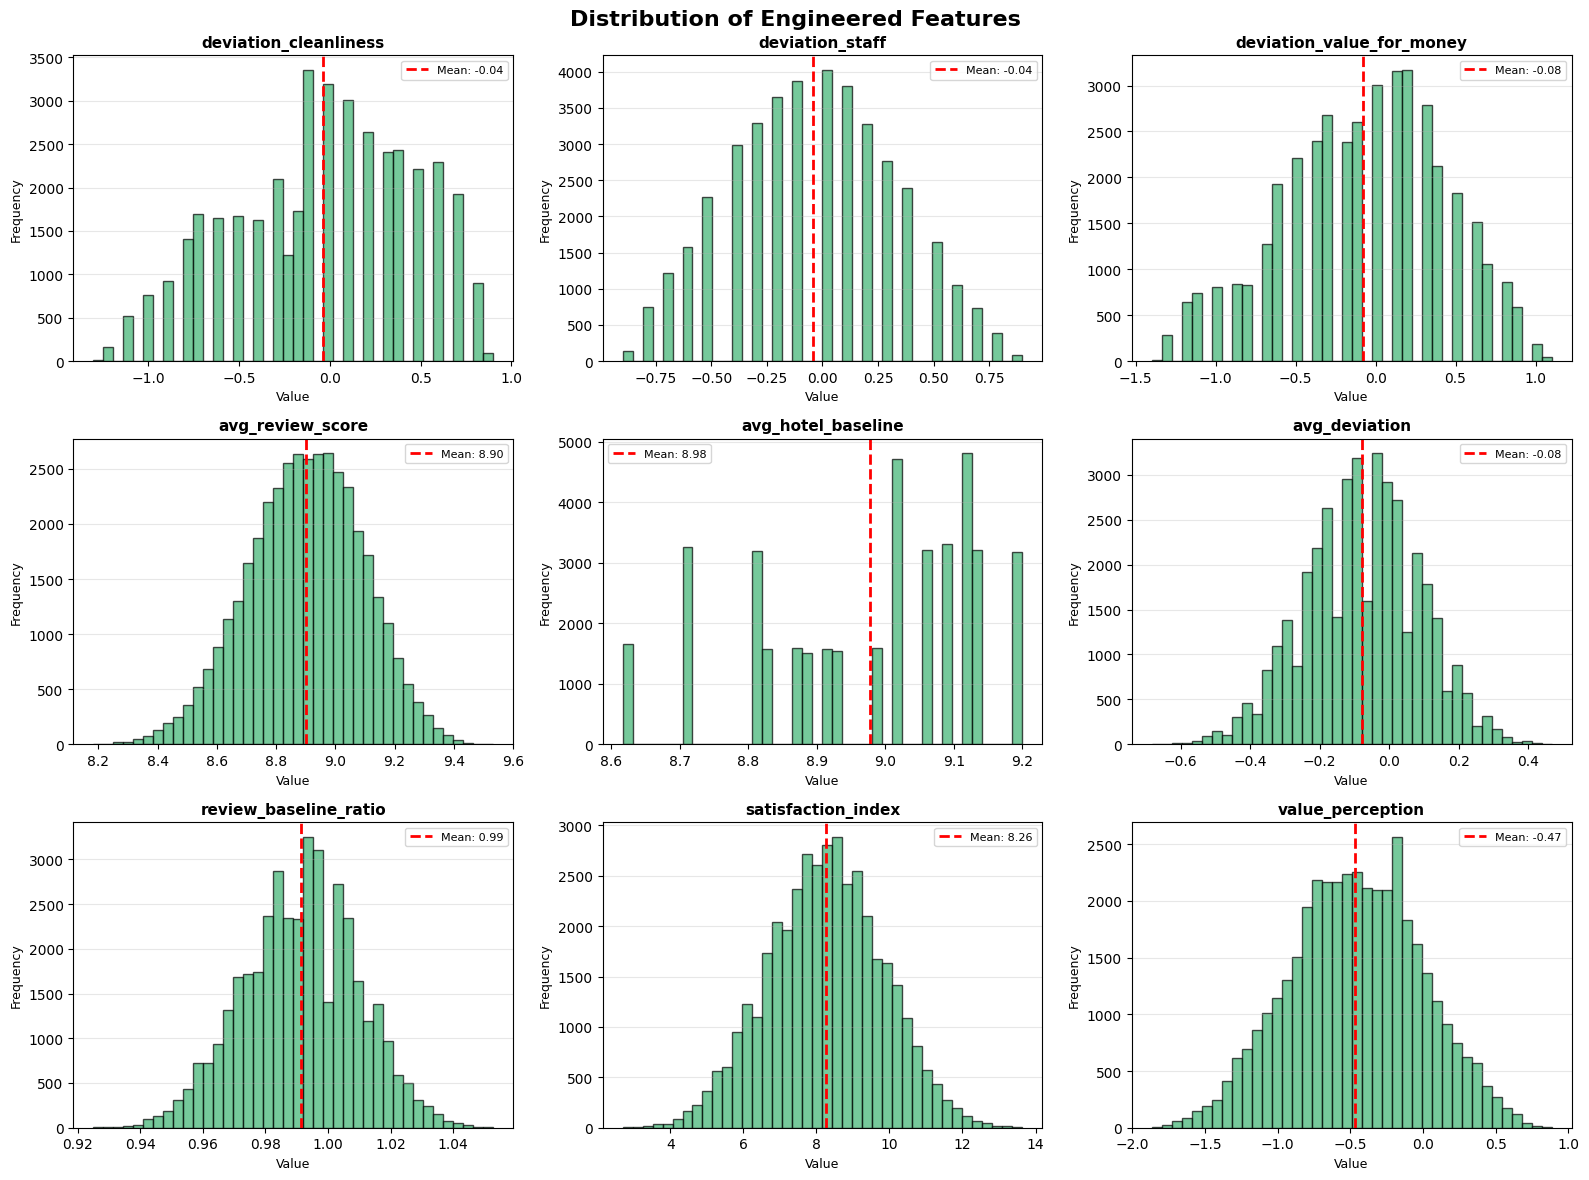


 Insights:
   - Deviation features centered around 0 (as expected)
   - Aggregate features show normal-like distributions
   - Interaction features capture additional variance


In [116]:
# Visualize the distribution of key engineered features

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

# Select key engineered features to visualize
key_features = [
    'deviation_cleanliness',
    'deviation_staff',
    'deviation_value_for_money',
    'avg_review_score',
    'avg_hotel_baseline',
    'avg_deviation',
    'review_baseline_ratio',
    'satisfaction_index',
    'value_perception'
]

for idx, feat in enumerate(key_features):
    axes[idx].hist(df_merged[feat], bins=40, color='mediumseagreen',
                   edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{feat}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

    # Add vertical line at mean
    mean_val = df_merged[feat].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2,
                      label=f'Mean: {mean_val:.2f}')
    axes[idx].legend(fontsize=8)

plt.suptitle('Distribution of Engineered Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n Insights:")
print("   - Deviation features centered around 0 (as expected)")
print("   - Aggregate features show normal-like distributions")
print("   - Interaction features capture additional variance")

## 4.4 - Feature Engineering Summary

In [121]:
# Summary of all engineered features
print("FEATURE ENGINEERING SUMMARY")

# Get all engineered feature columns
engineered_features = (
    deviation_cols +
    ['avg_review_score', 'avg_hotel_baseline', 'avg_deviation'] +
    interaction_cols
)

print("\n")
print(f"Total features created: {len(engineered_features)}")
print("\n Feature Categories:")
print(f"  1. Deviation features: {len(deviation_cols)}")
print(f"  2. Aggregate features: 3")
print(f"  3. Interaction features: {len(interaction_cols)}")

print("\n All Engineered Features:")
for i, feat in enumerate(engineered_features, 1):
    print(f"  {i:2d}. {feat}")

print("\n")
print(f"Final dataset shape: {df_merged.shape}")
print(f"Total features (including engineered): {len(df_merged.columns)}")

FEATURE ENGINEERING SUMMARY


Total features created: 12

 Feature Categories:
  1. Deviation features: 6
  2. Aggregate features: 3
  3. Interaction features: 3

 All Engineered Features:
   1. deviation_cleanliness
   2. deviation_comfort
   3. deviation_facilities
   4. deviation_location
   5. deviation_staff
   6. deviation_value_for_money
   7. avg_review_score
   8. avg_hotel_baseline
   9. avg_deviation
  10. review_baseline_ratio
  11. satisfaction_index
  12. value_perception


Final dataset shape: (39939, 38)
Total features (including engineered): 38


---

# Section 5: Data Preprocessing

**Objective:** Prepare data for machine learning models through encoding, scaling, and splitting.

## 5.1 - Categorical Encoding

TODO: Encode categorical variables using one-hot encoding or target encoding

In [99]:
# TODO: Preprocessing steps
# 1. One-hot encode: user_gender, user_age_group, user_traveller_type
# 2. Target encode or frequency encode: user_country (high cardinality)
# 3. Label encode target: country_group
# 4. Scale numerical features
# 5. Train-test-validation split (70-15-15, stratified)

# from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
# from sklearn.model_selection import train_test_split
#
# # Separate features and target
# X = df_merged.drop('country_group', axis=1)
# y = df_merged['country_group']
#
# # Encode categoricals
# # ... your code here
#
# # Split data (stratified)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
#
# print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

---

# Section 6: Model Development

**Objective:** Train and compare multiple classification models.

## 6.1 - Baseline Models

TODO: Train at least 4 models - Logistic Regression, Random Forest, XGBoost, and Shallow Neural Network

In [100]:
# TODO: Train multiple models
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from tensorflow import keras
#
# # Model 1: Logistic Regression
# lr_model = LogisticRegression(max_iter=1000, random_state=42)
# lr_model.fit(X_train, y_train)
#
# # Model 2: Random Forest
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)
#
# # Model 3: XGBoost
# xgb_model = XGBClassifier(n_estimators=100, random_state=42)
# xgb_model.fit(X_train, y_train)
#
# # Model 4: Shallow Neural Network
# nn_model = keras.Sequential([
#     keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     keras.layers.Dropout(0.3),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dropout(0.3),
#     keras.layers.Dense(11, activation='softmax')  # 11 classes
# ])
# nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# nn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

---

# Section 7: Model Evaluation

**Objective:** Evaluate and compare all models using accuracy, precision, recall, and F1-score.

## 7.1 - Model Comparison

TODO: Evaluate all models on test set and create comparison table

In [101]:
# TODO: Model evaluation
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
#
# models = {
#     'Logistic Regression': lr_model,
#     'Random Forest': rf_model,
#     'XGBoost': xgb_model,
#     'Neural Network': nn_model
# }
#
# results = []
# for name, model in models.items():
#     y_pred = model.predict(X_test)
#     results.append({
#         'Model': name,
#         'Accuracy': accuracy_score(y_test, y_pred),
#         'Precision': precision_score(y_test, y_pred, average='weighted'),
#         'Recall': recall_score(y_test, y_pred, average='weighted'),
#         'F1-Score': f1_score(y_test, y_pred, average='weighted')
#     })
#
# results_df = pd.DataFrame(results)
# print(results_df)
#
# # Confusion matrix for best model
# best_model = rf_model  # Choose your best
# y_pred = best_model.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.show()
#
# # Classification report
# print(classification_report(y_test, y_pred))

---

# Section 8: Model Explainability (XAI)

**Objective:** Use SHAP and LIME to explain model predictions and identify important features.

## 8.1 - SHAP Analysis

TODO: Global and local explanations using SHAP

In [102]:
# TODO: SHAP analysis
# import shap
#
# # Initialize explainer (use TreeExplainer for tree-based models)
# explainer = shap.TreeExplainer(best_model)
# shap_values = explainer.shap_values(X_test)
#
# # Global feature importance
# shap.summary_plot(shap_values, X_test)
# shap.summary_plot(shap_values, X_test, plot_type="bar")
#
# # Local explanations (pick 3-5 instances)
# for i in [0, 10, 50]:
#     shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i])
#     shap.waterfall_plot(shap.Explanation(values=shap_values[i],
#                                          base_values=explainer.expected_value,
#                                          data=X_test.iloc[i]))

## 8.2 - LIME Analysis

TODO: Local instance explanations using LIME

In [103]:
# TODO: LIME analysis
# import lime
# import lime.lime_tabular
#
# # Initialize explainer
# explainer = lime.lime_tabular.LimeTabularExplainer(
#     X_train.values,
#     feature_names=X_train.columns,
#     class_names=['North_America', 'Western_Europe', ...],  # all 11 classes
#     mode='classification'
# )
#
# # Explain same instances as SHAP for comparison
# for idx in [0, 10, 50]:
#     exp = explainer.explain_instance(X_test.iloc[idx].values,
#                                       best_model.predict_proba)
#     exp.show_in_notebook()
#     exp.as_pyplot_figure()

---

# Section 9: Inference Function

**Objective:** Create a deployable function that accepts raw input and returns predictions in natural language.

TODO: Build inference function that preprocesses input and returns human-readable predictions

In [104]:
# TODO: Create inference function
# def predict_country_group(user_gender, user_age_group, user_traveller_type,
#                           user_country, review_score_overall,
#                           review_score_cleanliness, review_score_comfort,
#                           review_score_facilities, review_score_location,
#                           review_score_staff, review_score_value_for_money,
#                           hotel_cleanliness_base, hotel_comfort_base,
#                           hotel_facilities_base, hotel_location_base,
#                           hotel_staff_base, hotel_value_for_money_base):
#     """
#     Predicts the country group of a hotel based on user and hotel features.
#
#     Returns:
#         str: Predicted country group in natural language
#     """
#
#     # 1. Create input dataframe
#     input_data = pd.DataFrame({
#         'user_gender': [user_gender],
#         'user_age_group': [user_age_group],
#         # ... add all features
#     })
#
#     # 2. Apply same preprocessing (encoding, scaling, feature engineering)
#     # ... your preprocessing code here
#
#     # 3. Make prediction
#     prediction = best_model.predict(processed_input)[0]
#
#     # 4. Convert to natural language
#     country_group_map = {
#         'North_America': 'North America (United States, Canada)',
#         'Western_Europe': 'Western Europe (Germany, France, UK, Netherlands, Spain, Italy)',
#         # ... rest of mappings
#     }
#
#     return country_group_map[prediction]
#
# # Test with examples
# example_1 = predict_country_group(
#     user_gender='Male',
#     user_age_group='25-34',
#     user_traveller_type='Business',
#     # ... provide all parameters
# )
# print(f"Prediction: {example_1}")

---

# Section 10: Conclusions & Future Work

## 10.1 - Summary of Achievements

TODO: Summarize what was accomplished

## 10.2 - Key Findings

TODO: List the most important insights from EDA, modeling, and XAI

## 10.3 - Model Performance

TODO: Discuss final model performance and limitations

## 10.4 - Future Improvements

TODO: Suggest improvements for future milestones
- Use review_text for NLP/sentiment analysis
- Incorporate temporal features (seasonality)
- Try ensemble methods or deep learning
- Build real-time recommendation system

---

# End of Notebook